## Preprocessing

In [1]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_text(text, my_stop_words):
    # Convertir todo el texto a minúsculas
    text = text.lower()

    # Eliminar signos de puntuación
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Tokenización de palabras
    words = nltk.word_tokenize(text)

    # Lematización
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Eliminación de stopwords
    stpwrd = stopwords.words('english')
    # Mis propias stopwords
    stpwrd.extend(my_stop_words)
    stop_words = set(stpwrd)
    words = [word for word in words if word not in stop_words]

    # Unir las palabras procesadas en un solo texto
    processed_text = ' '.join(words)

    return processed_text

[nltk_data] Downloading package punkt to /Users/abueno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abueno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/abueno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/abueno/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
#Ejemplo de uso
text = "This is an example sentence. It is used to demonstrate the preprocessing function."
processed_text = preprocess_text(text, ["function"])
print(processed_text)

example sentence used demonstrate preprocessing


In [3]:
def process_reviews(reviews, my_stop_words):
    processed_sentences = []
    for sent in reviews:
        if not sent != sent:  # check if sent is not nan
            sent = preprocess_text(sent, my_stop_words)
            processed_sentences.append(sent)
        else:
            processed_sentences.append('None')
    return processed_sentences

In [4]:
import pandas as pd

# Read CSV file into DataFrame df
df = pd.read_csv('balanced_reviews.csv', index_col=0)

# Show dataframe
print(df)

         overall                                         reviewText
2116689      1.0  I'm so disappointed with this game. Been playi...
1859378      1.0                The controller didn't even work smh
58133        1.0  Crappy item went to remove out of sons tv firs...
2176318      1.0  man do all soccer games suck or is it me. This...
1618021      1.0  I love the Persona series!!!! I hate the gamep...
...          ...                                                ...
176722       5.0  What I love about this game is that you get to...
1666472      5.0  Big hit with the kids. They loved playing with...
177776       5.0  I originally heard about this game before it e...
439424       5.0  Another sim that won't work on Windows 10. Win...
2101811      5.0  Unlike most I did receive my game on time and ...

[176630 rows x 2 columns]


In [12]:
my_stop_words = ["game", "play", "level", "character", "one", "mouse", "got", "people", "gameplay", "run", "first", "will", "review", "mouse", "control", "system", "playing", "controller", "player"]
reviews_processed = process_reviews(df['reviewText'], my_stop_words)

In [13]:
len(reviews_processed)

176630

In [19]:
df['reviewText'] = reviews_processed
reviews_processed

['im disappointed civilization since early day always loved decided give chance newest im completely regretting im running core i74790k 16 gb ram geforce gtx 750 ti latest driver installed way requirement im getting every 510 minute crash say something like display device failed please make sure latest driver installed error code anything thatll help fix properly payed 80 buck great',
 'didnt even work smh',
 'crappy item went remove son tv time removed three prong broke tv far remove recommend',
 'man soccer suck horried waste yopur time',
 'love persona series hate etrian odyssey series wa excited crossover make map really social link work unrewarding battle experience totally killed motivation ever pick',
 'consists endless amount poorly scripted chit chat boring cinematics actual even worse 2 view landscape type view walk around attack second attack view little youre fighing wait weapon charge tell 2 squad attack prepare special attack move mech forward backward yes side side real 

## Post preprocesamiento Análisis


In [15]:
all_words = ''.join(reviews_processed)

splitted_reviews = all_words.lower().split()



In [16]:
splitted_reviews

['im',
 'disappointed',
 'civilization',
 'since',
 'early',
 'day',
 'always',
 'loved',
 'decided',
 'give',
 'chance',
 'newest',
 'im',
 'completely',
 'regretting',
 'im',
 'running',
 'core',
 'i74790k',
 '16',
 'gb',
 'ram',
 'geforce',
 'gtx',
 '750',
 'ti',
 'latest',
 'driver',
 'installed',
 'way',
 'requirement',
 'im',
 'getting',
 'every',
 '510',
 'minute',
 'crash',
 'say',
 'something',
 'like',
 'display',
 'device',
 'failed',
 'please',
 'make',
 'sure',
 'latest',
 'driver',
 'installed',
 'error',
 'code',
 'anything',
 'thatll',
 'help',
 'fix',
 'properly',
 'payed',
 '80',
 'buck',
 'greatdidnt',
 'even',
 'work',
 'smhcrappy',
 'item',
 'went',
 'remove',
 'son',
 'tv',
 'time',
 'removed',
 'three',
 'prong',
 'broke',
 'tv',
 'far',
 'remove',
 'recommendman',
 'soccer',
 'suck',
 'horried',
 'waste',
 'yopur',
 'timelove',
 'persona',
 'series',
 'hate',
 'etrian',
 'odyssey',
 'series',
 'wa',
 'excited',
 'crossover',
 'make',
 'map',
 'really',
 'social'

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

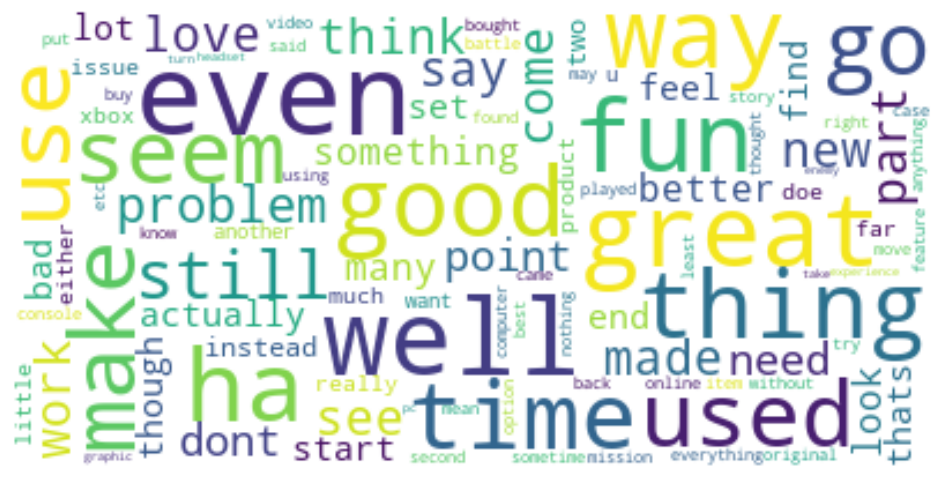

In [18]:
plot_word_cloud(splitted_reviews)

## Conclusión

Por concluir, vemos que ya tenemos palabras que puedan aportar algo más de importancia como GOOD o GREAT, LOVE, PROBLEM.

Guardamos el preprocesamiento

In [20]:
df.head()

,overall,reviewText
2116689,1.0,im disappointed civilization since early day a...
1859378,1.0,didnt even work smh
58133,1.0,crappy item went remove son tv time removed th...
2176318,1.0,man soccer suck horried waste yopur time
1618021,1.0,love persona series hate etrian odyssey series...


In [21]:
pd.DataFrame(df).to_csv("preprocessed_reviews.csv")